# Matplotlib图鉴——进阶散点图

## 公众号：可视化图鉴

In [3]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei'] # mac自带中文

3.3.2
1.2.0
1.19.2


注意，代码在以下环境全部通过测试:
- Python 3.8
- Matplotlib == 3.3.2
- pandas == 1.2.0
- numpy == 1.19.2

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

### 进阶散点图-去掉画布外框、去掉坐标轴刻度横线、圆点根据mc排名大小设置面积大小

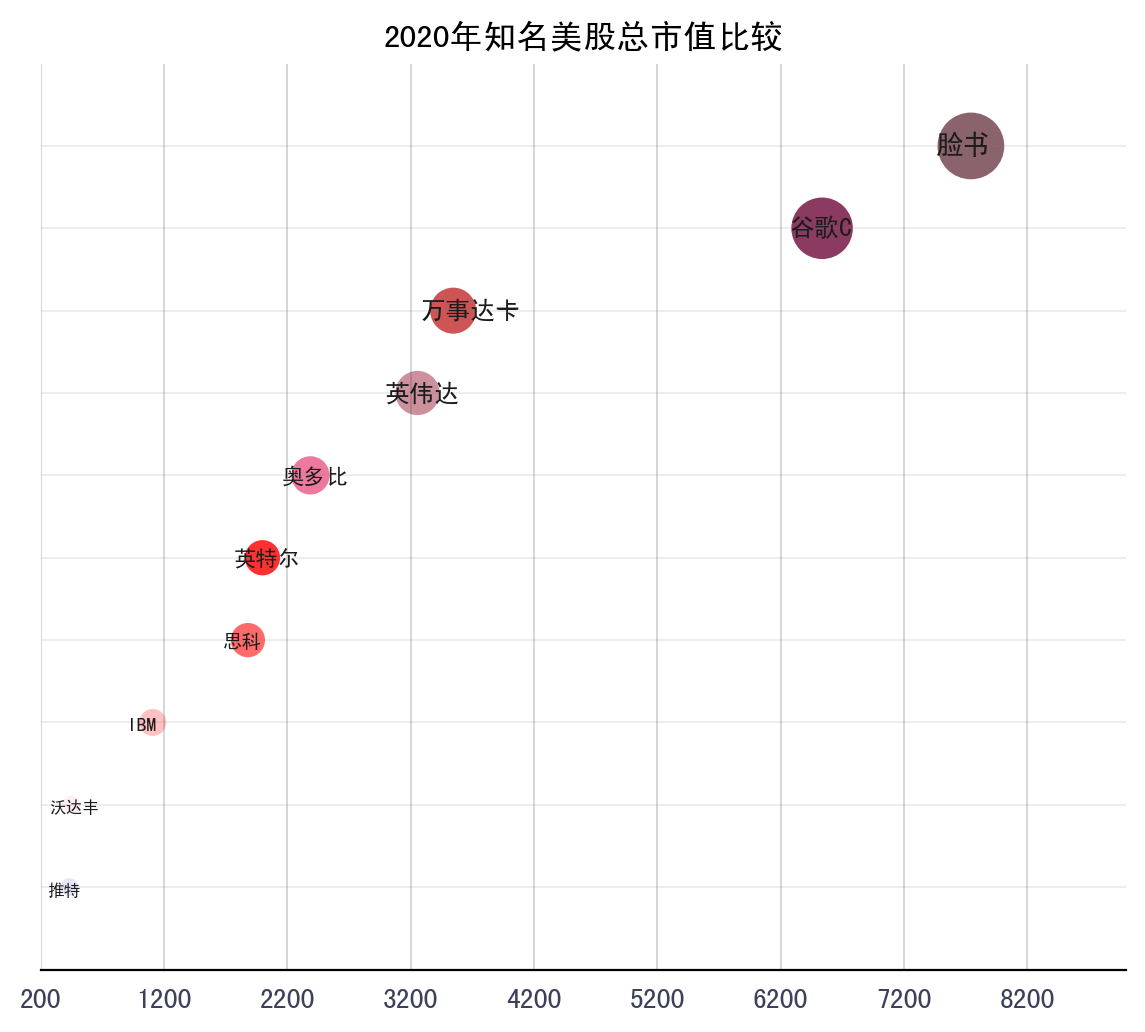

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MC represents market capitalization

"""准备数据"""
data=pd.DataFrame(data={'rank':[10,9,8,7,6,5,4,3,2,1],
                        'company':['推特','沃达丰','IBM','思科','英特尔','奥多比','英伟达','万事达卡','谷歌C','脸书'],
                        'MC':[432.11, 446.75, 1107.94, 1879.51, 1997.78, 2386.36, 3254.89,3544.57,6536.81, 7743.65]})




#散点大小，由MC数据归一化到0-500
data['size']=data['MC']*500/(data['MC'].max()-data['MC'].min())


#圆点颜色值 rgb十六进制
data['color']=[ '#E6E6FA', '#FFF0F5', '#FFC1C1', '#FF6A6A', '#FF3030','#EE799F', '#CD919E', '#CD5555', '#8B3A62','#8B636C']

#圆点Y值
data['Y']=10-data['rank']

fig,ax = plt.subplots(1,1,figsize =(7,6),dpi=200)

#隐藏y轴
ax.get_yaxis().set_visible(False)

#将刻度小横线设置为白色，标签颜色为黑色
plt.tick_params(axis='x',color='w',labelcolor='#3d405b')


#x,y轴刻度范围
ax.set_xlim(200, 9000)
ax.set_xticks(range(200, 9000, 1000))
ax.set_ylim(-1,10)


#画 x，y水平线，设置颜色，线类型，和线宽度
for i in range(200,9000,1000):
    ax.axvline(x=i,c="gray",ls="-",lw=0.1)
for y in range(10):
    ax.axhline(y=y,c="gray",ls="-",lw=0.1)

#画散点图，传入s参数，绘制不同面积的圆点
ax.scatter('MC', 'company', c='color', s='size', data=data)   #c : color  s :size  这里传入了序列

plt.grid(color = 'black',linewidth = 0.1,alpha = 0.7,axis = 'x')
plt.grid(color = 'whihe',linewidth = 0.5,alpha = 0.7,axis = 'y')
#标注圆点文字，设置圆点内文字大小，mc越高文字越大

data['text_size']=[6,6,7,7,8,8,9,9,9,10]
for rank,company in zip(data['rank'],data['company']):
    MC=data[data['company']==company]['MC']
    text_size=data[data['company']==company]['text_size']
    ax.text(MC-500*text_size/17,10-rank-0.1,company,fontdict={'color':'#1C1C1C','size':text_size},fontweight='heavy')

#去掉上下左右外框
for i in ['top','right','left']:
    ax.spines[i].set_visible(False)
plt.title("2020年知名美股总市值比较")
# plt.savefig("D_07.png")
plt.show()



### 进阶散点图-纵轴显示公司名 

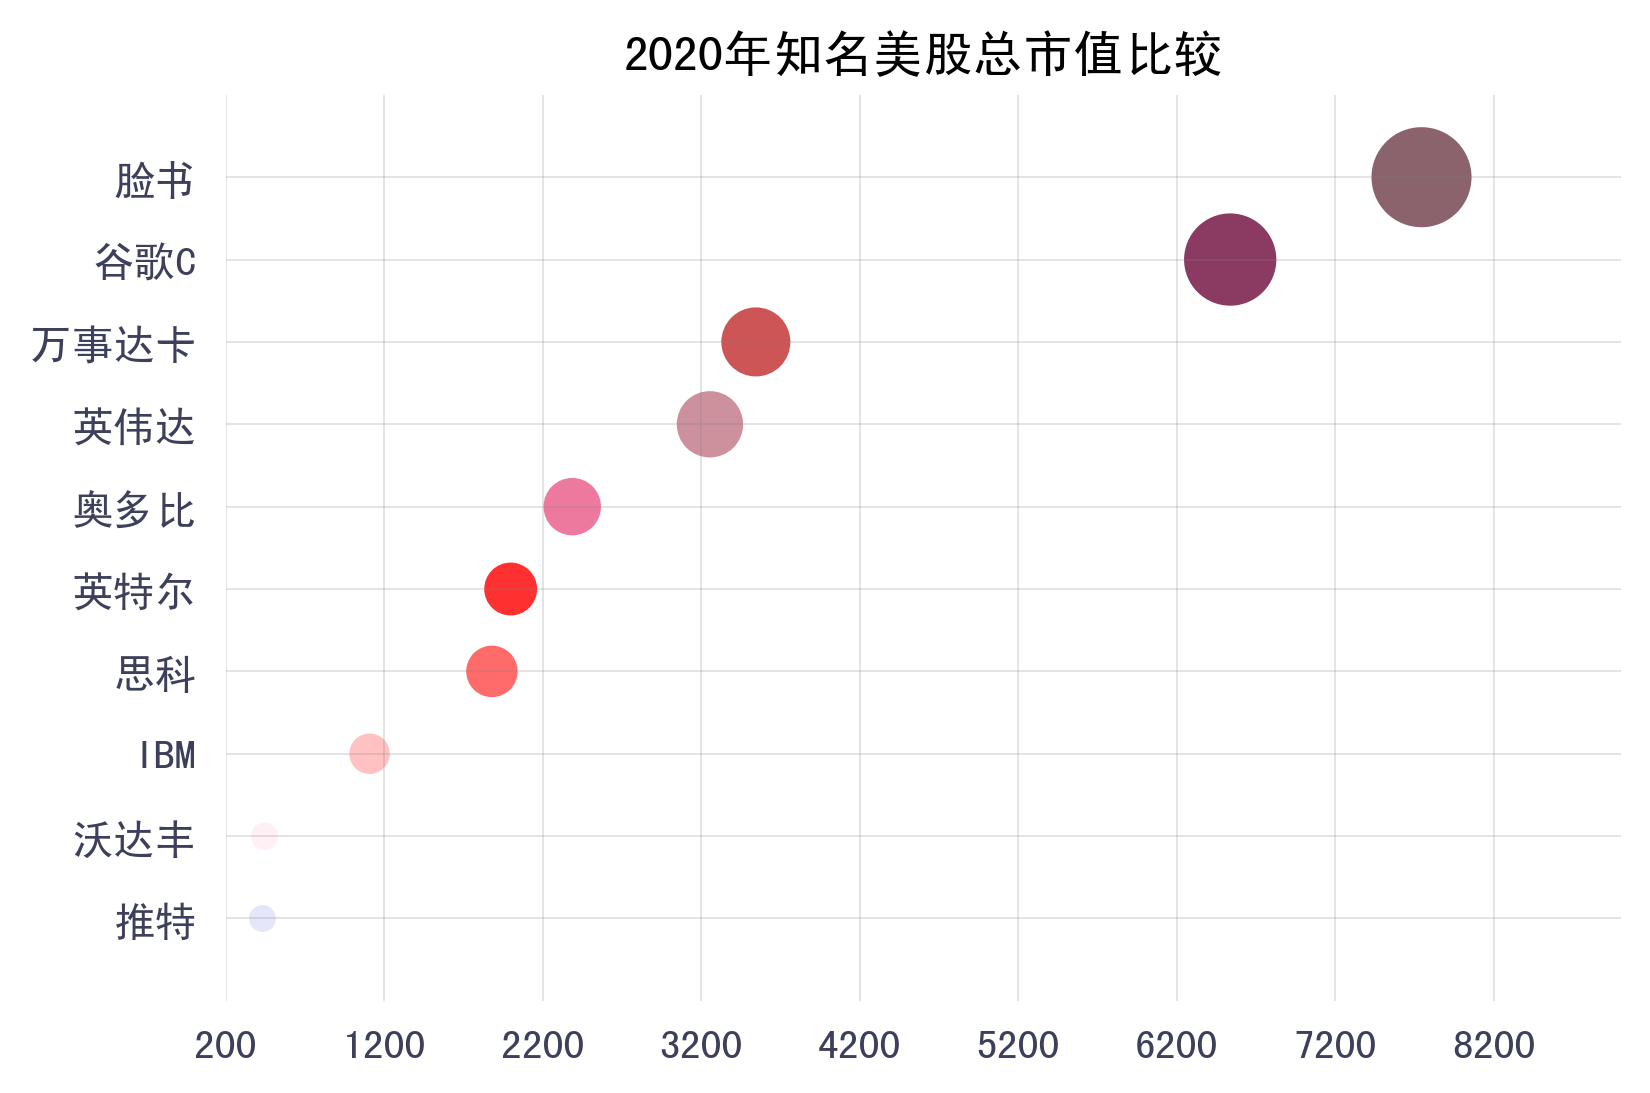

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为`a方块的问题

"""准备数据"""
data=pd.DataFrame(data={'rank':[10,9,8,7,6,5,4,3,2,1],
                        'company':['推特','沃达丰','IBM','思科','英特尔','奥多比','英伟达','万事达卡','谷歌C','脸书'],
                        'MC':[432.11, 446.75, 1107.94, 1879.51, 1997.78, 2386.36, 3254.89,3544.57,6536.81, 7743.65]})


#散点大小 ，由mc数值归一化到0-500
data['size']=data['MC']*500/(data['MC'].max()-data['MC'].min())

#圆点颜色值 rgb十六进制
data['color']=[ '#E6E6FA', '#FFF0F5', '#FFC1C1', '#FF6A6A', '#FF3030','#EE799F', '#CD919E', '#CD5555', '#8B3A62','#8B636C']

#圆点Y值
data['Y']=10-data['rank']

#开始画图
fig,ax=plt.subplots(1,1,dpi=300)

#将刻度小横线设置为白色，标签颜色为深蓝色
plt.tick_params(axis='x',color='w',labelcolor='#3d405b')
plt.tick_params(axis='y',color='w',labelcolor='#3d405b')

#x,y轴刻度范围
ax.set_xlim(200, 9000)
ax.set_xticks(range(200, 9000, 1000))
ax.set_ylim(-1,10)

# y轴标签
ylabels=data['company'].tolist()
ax.set_ylim(-1,10)
ax.set_yticklabels(ylabels)

#画 x，y水平线，设置颜色，线类型，和线宽度
for i in range(200,9000,1000):
    ax.axvline(x=i,c="gray",ls="-",lw=0.1)
for y in range(10):
    ax.axhline(y=y,c="gray",ls="-",lw=0.1)


#画散点图 设置圆点内文字大小，gdp越高文字越大
ax.scatter('MC', 'company', c='color', s='size', data=data)   #c : color  s :size  这里传入了序列

#隐藏上下左右外边框
for i in ['top','right','left','bottom']:
    ax.spines[i].set_visible(False)
plt.title("2020年知名美股总市值比较")
# plt.savefig("D_08.png")
plt.show()
plt.close()